# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [2]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOSsky.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,18.00,38.00,14.00,18.00,59.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0,1.0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,18.00,38.00,14.00,18.00,59.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0,2.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,18.00,38.00,14.00,18.00,59.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000,3.7,0.0,76.0,0.4,1011.9,1015.5,66.2,0.00,0.0,4.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,18.00,38.00,14.00,18.00,59.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000,12.9,0.0,294.2,0.7,1013.2,1016.7,41.2,1.39,6960.0,4.0
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-7.667883,-2.00,6.00,0,0,0,4,18.00,38.00,14.00,18.00,59.00,1013.2,1015.8,0.0,18.825,1.850,2.650,175.300,3.925,165.250,348.000000,1.0,2.2,1016.5,82.0,8.5,0.0,0.0,210.000000,1.100000,143.0,5.0,9.6,1016.5,55.000000,20.5,0.0,212.9,2.4,1012.4,1015.8,24.1,7.05,17760.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,3.4,0.0,319.3,3.5,1020.8,1024.0,55.3,22.30,36600.0,2.0
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333,3.1,0.0,314.6,2.6,1020.8,1024.1,57.8,22.30,36600.0,2.0
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.333333,8.0,10.2,1023.7,57.0,5.6,2.0,0.0,299.333333,8.133333,313.0,14.0,5.0,1023.2,46.666667,2.7,0.0,336.2,2.4,1020.9,1024.2,59.6,22.30,36600.0,2.0
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-3.728437,3.75,-1.17,0,0,0,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.contaniner { width:100% !important;}</style>"))
pd.options.display.max_columns = 999
import matplotlib.font_manager as fm
import matplotlib as mpl
print ('설정 파일 위치: ', mpl.matplotlib_fname())
mpl.rcParams['axes.unicode_minus'] =False
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]
plt.rcParams["font.family"] = 'Malgun Gothic'

설정 파일 위치:  C:\Users\silen\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
cond = plant.loc[plant["COND_LOC"] == 1]

C:\Users\silen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\silen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\silen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\silen\Anaconda3\lib\site-packages\pandas\plotting\_matpl

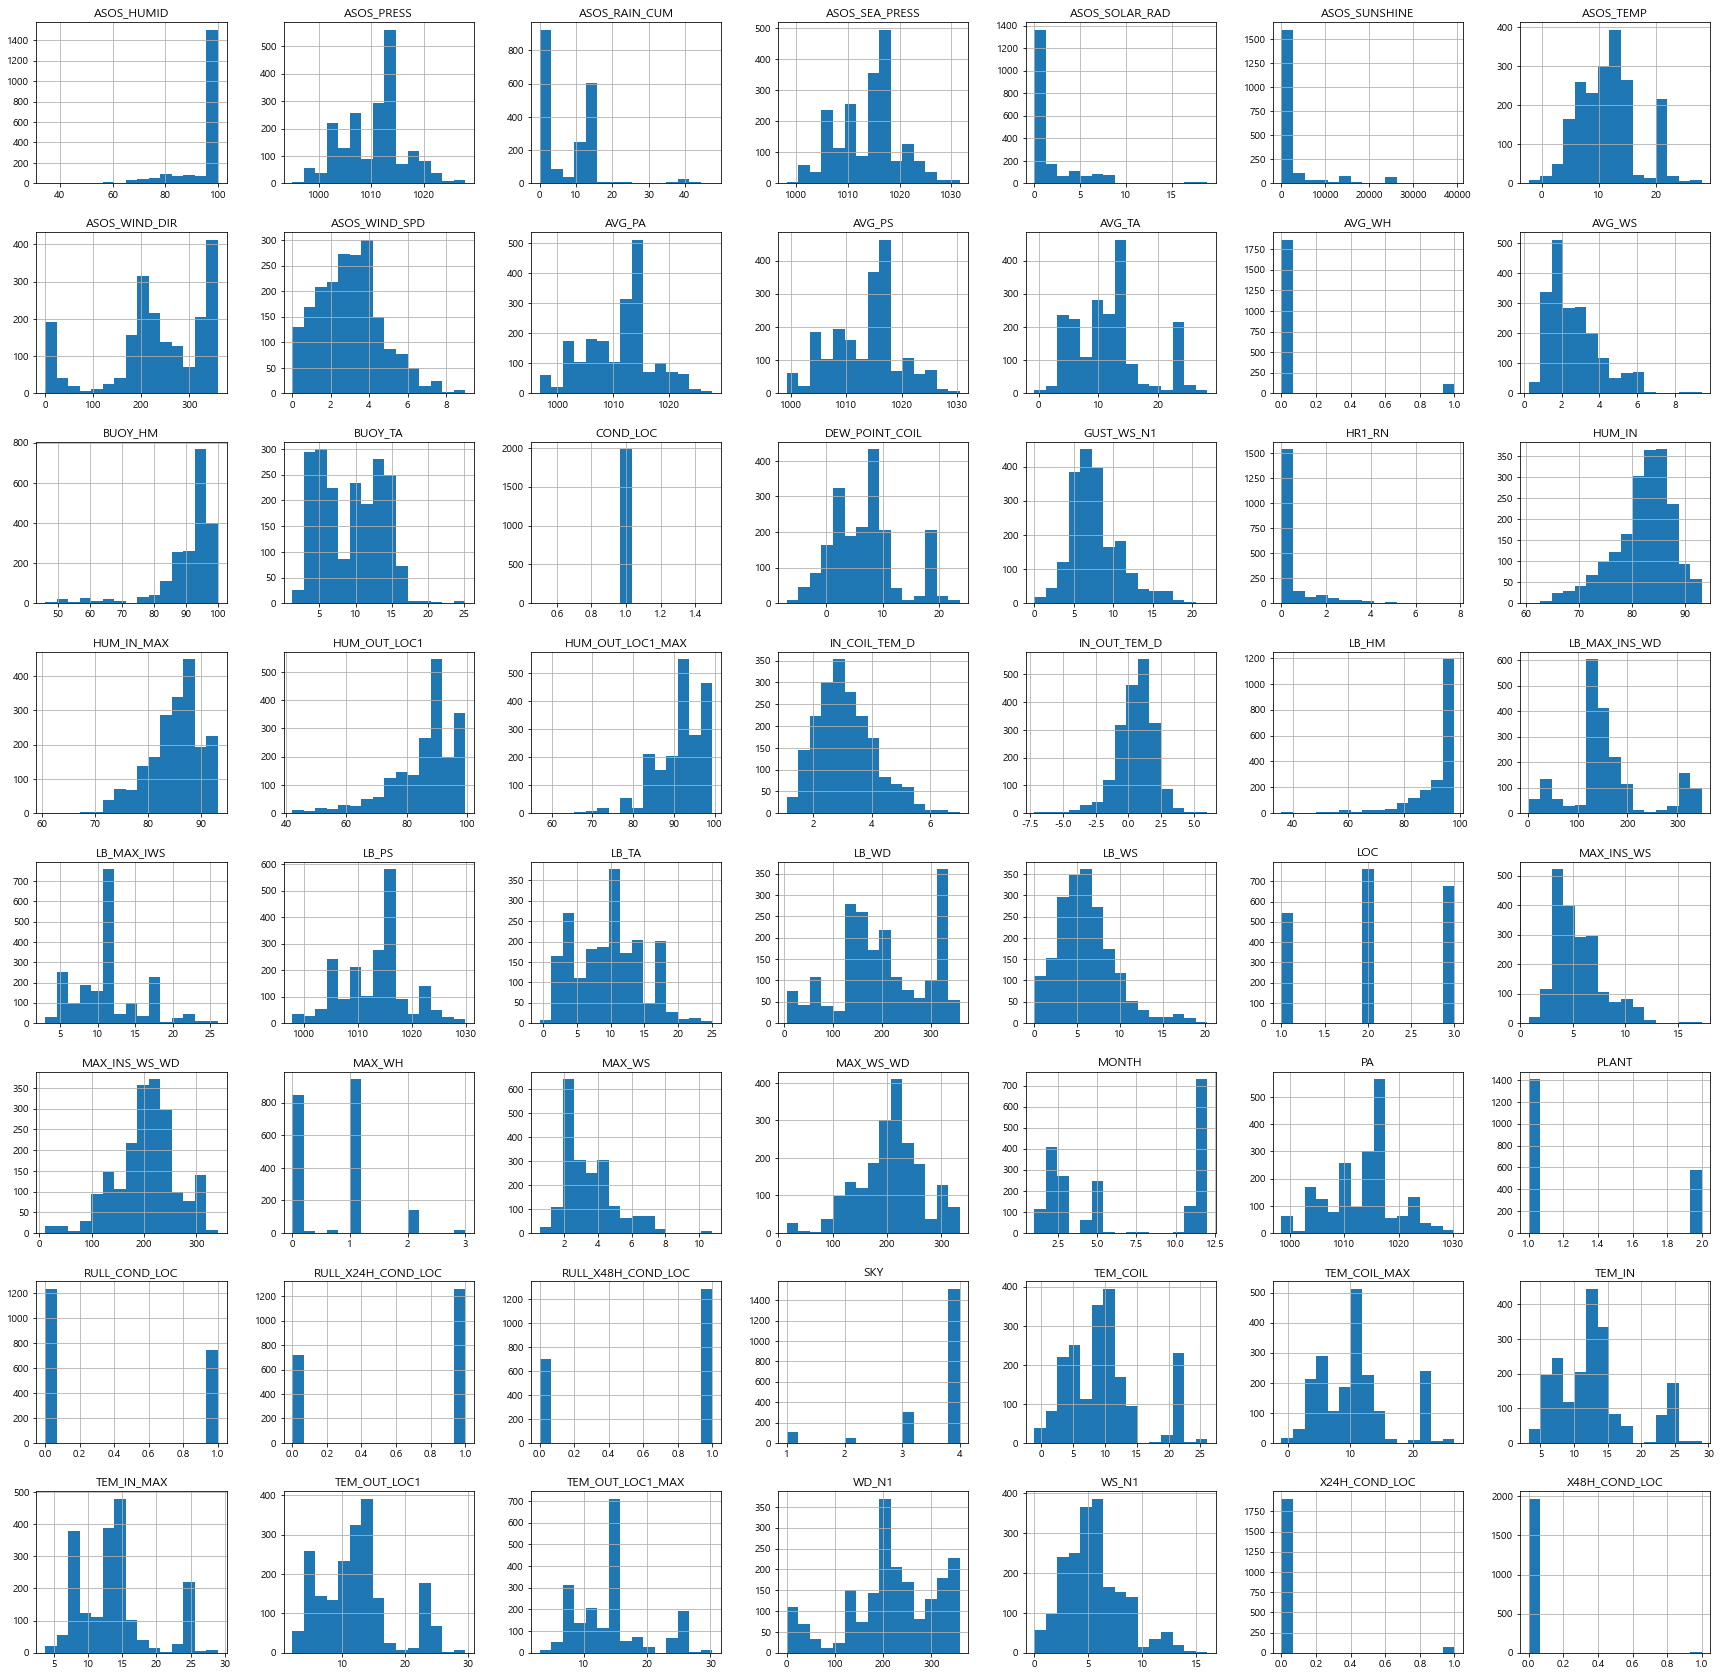

In [5]:
cond.hist(bins= 15, figsize=(30,30))
plt.show()

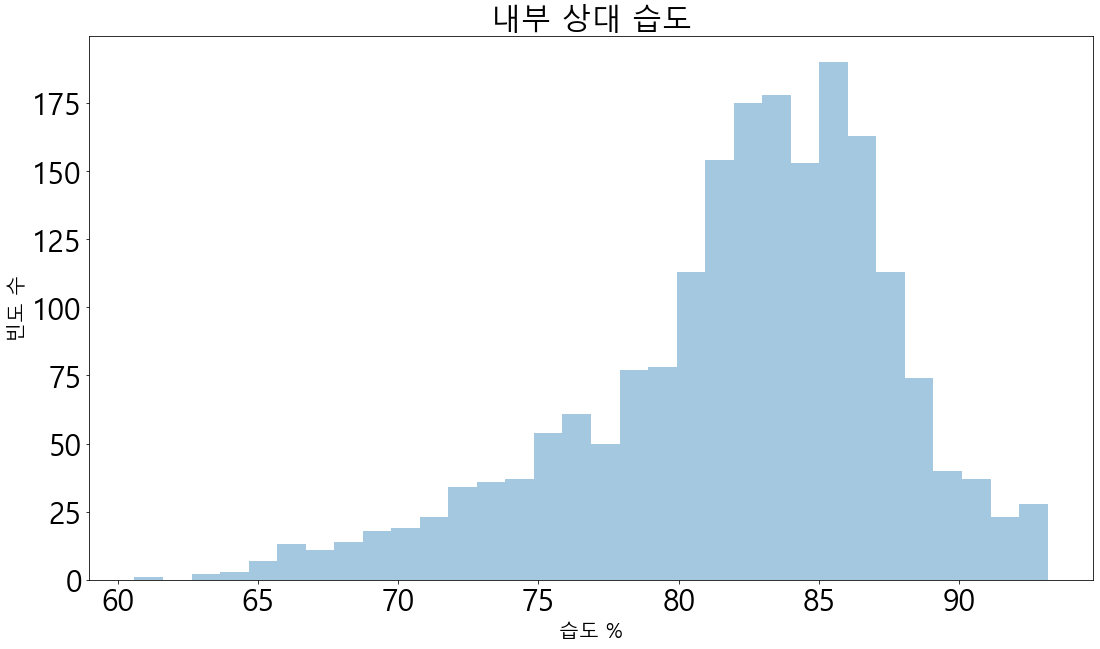

In [6]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN"], kde=False)
plt.title("내부 상대 습도", fontsize=30)
plt.xlabel("습도 %",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [7]:
cond.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
139,2016-04-06 09:00:00,1,3,13.0,84.0,11.0,11.0,45.0,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,8.400606,2.0,2.0,1,1,1,4,17.0,84.0,15.0,20.0,62.0,1017.2,1019.9,0.0,9.775,1.400,1.850,115.750,2.80,118.850,145.0,4.0,5.3,1019.6,78.0,8.3,0.0,0.0,41.0,3.8,48.0,5.0,7.9,1019.6,65.0,13.2,0.0,47.3,2.0,1016.0,1019.5,34.4,1.16,3600.0,4.0
179,2016-04-08 09:00:00,1,2,13.0,80.0,10.0,9.0,75.0,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,6.709351,4.0,3.0,0,1,1,4,16.0,80.0,14.0,16.0,81.0,1014.9,1017.6,0.0,8.450,1.075,1.825,210.325,2.65,206.025,180.0,2.0,4.0,1017.2,100.0,6.3,0.0,0.0,144.0,3.6,176.0,6.0,5.0,1017.6,97.0,7.5,0.0,229.4,1.6,1014.4,1018.0,97.4,0.55,0.0,2.0
187,2016-04-08 09:00:00,1,3,12.0,82.0,9.0,9.0,75.0,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,6.092657,3.0,3.0,0,1,1,4,15.0,82.0,13.0,16.0,81.0,1014.9,1017.6,0.0,8.450,1.075,1.825,210.325,2.65,206.025,180.0,2.0,4.0,1017.2,100.0,6.3,0.0,0.0,144.0,3.6,176.0,6.0,5.0,1017.6,97.0,7.5,0.0,229.4,1.6,1014.4,1018.0,97.4,0.55,0.0,2.0
188,2016-04-08 12:00:00,1,3,13.0,80.0,10.0,12.0,63.0,1.0,2016-04-09 12:00:00,0.0,2016-04-10 12:00:00,0.0,6.709351,1.0,3.0,0,1,1,4,15.0,82.0,13.0,16.0,81.0,1014.2,1016.8,0.0,15.450,2.750,3.575,190.725,5.40,181.400,189.0,6.0,7.7,1017.3,100.0,6.2,0.0,0.0,145.0,5.4,139.0,7.0,7.0,1016.8,97.0,14.9,0.0,193.8,4.0,1013.5,1016.9,71.7,5.77,8400.0,2.0
203,2016-04-09 09:00:00,1,2,13.0,79.0,9.0,11.0,75.0,1.0,2016-04-10 09:00:00,0.0,2016-04-11 09:00:00,0.0,5.554251,2.0,4.0,0,1,1,4,17.0,79.0,15.0,15.0,85.0,1012.8,1015.5,0.0,10.225,2.525,3.175,198.575,4.70,206.725,179.0,5.0,7.2,1014.8,100.0,7.2,0.0,0.0,132.0,4.0,151.0,6.0,7.3,1015.4,97.0,9.0,0.0,190.0,3.6,1012.2,1015.7,97.4,0.27,0.0,1.0


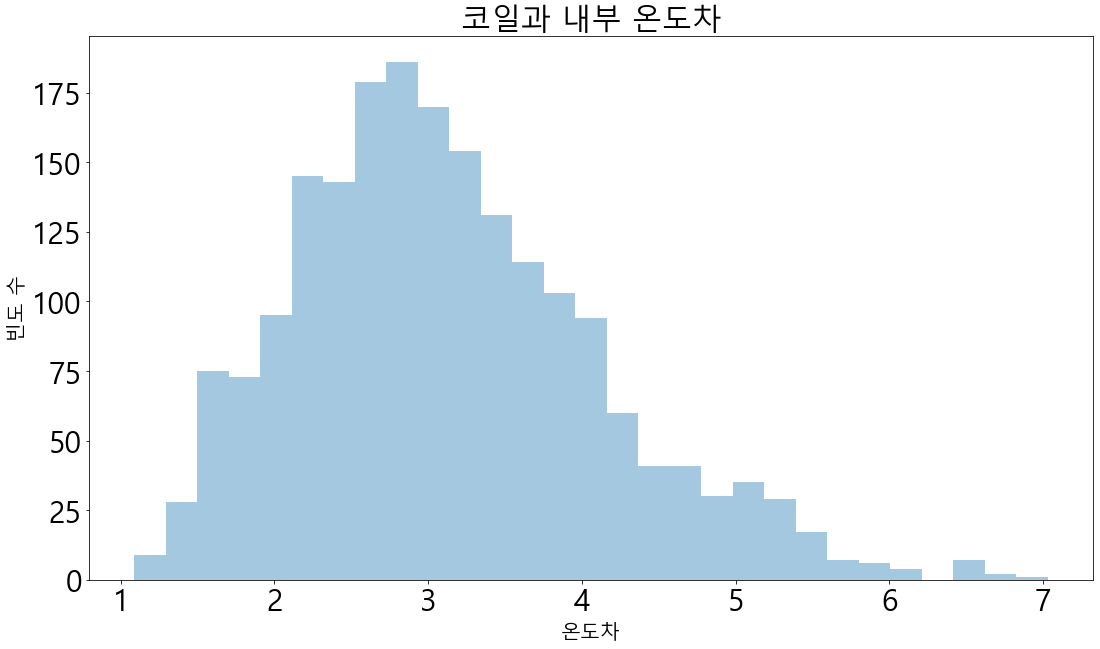

In [8]:
plt.figure(figsize=(18,10))
sns.distplot(cond["IN_COIL_TEM_D"], kde=False)
plt.title("코일과 내부 온도차", fontsize=30)
plt.xlabel("온도차",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

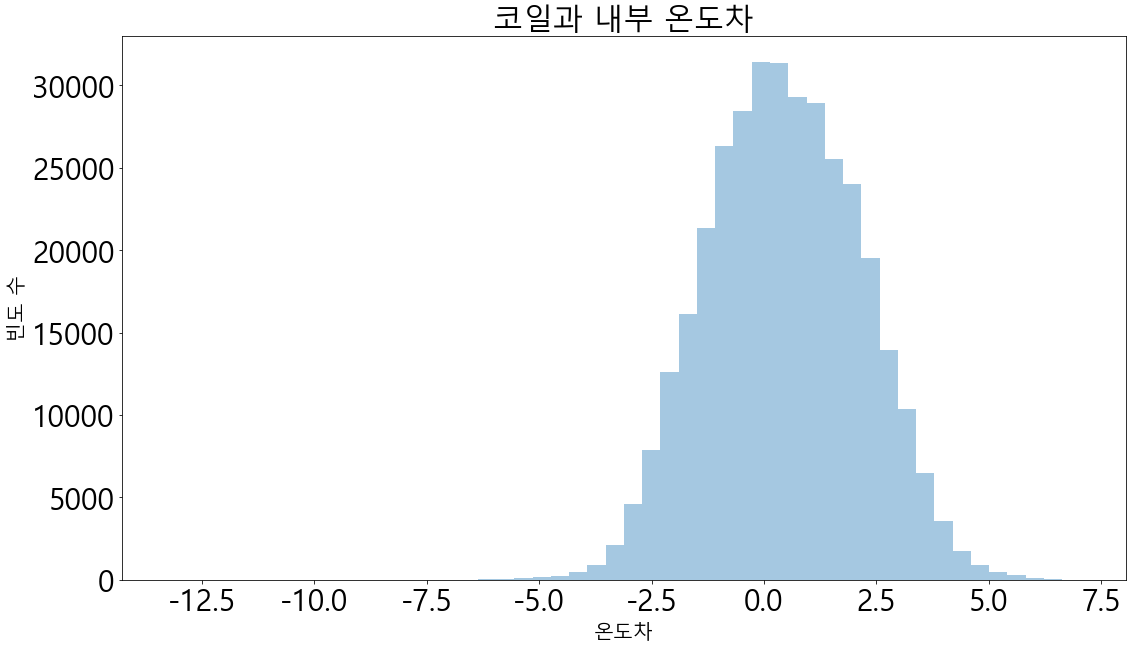

In [9]:
plt.figure(figsize=(18,10))
sns.distplot(plant["IN_COIL_TEM_D"], kde=False)
plt.title("코일과 내부 온도차", fontsize=30)
plt.xlabel("온도차",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

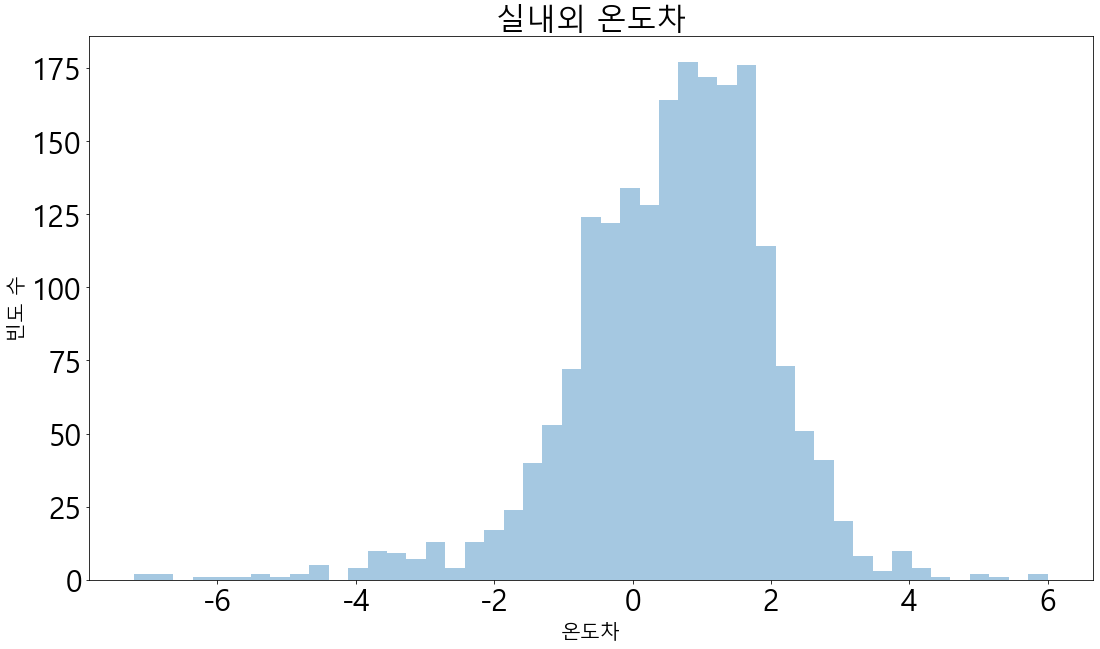

In [10]:
plt.figure(figsize=(18,10))
sns.distplot(cond["IN_OUT_TEM_D"], kde=False)
plt.title("실내외 온도차", fontsize=30)
plt.xlabel("온도차",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

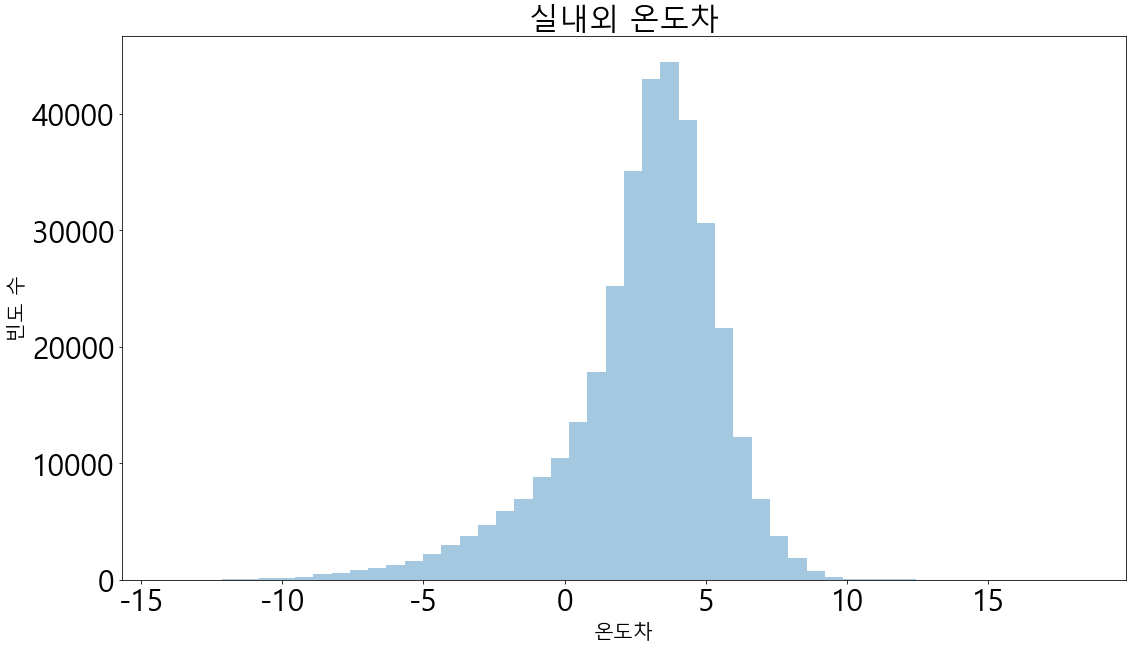

In [11]:
plt.figure(figsize=(18,10))
sns.distplot(plant["IN_OUT_TEM_D"], kde=False)
plt.title("실내외 온도차", fontsize=30)
plt.xlabel("온도차",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

No handles with labels found to put in legend.


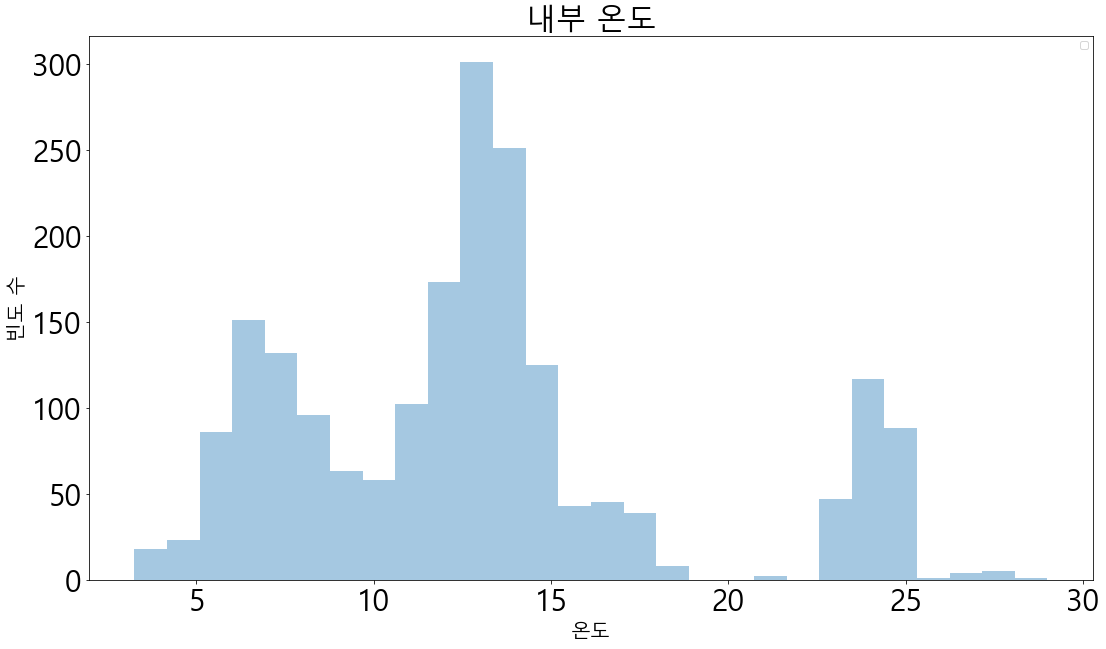

In [12]:
plt.figure(figsize=(18,10))
sns.distplot(cond["TEM_IN"], kde=False)
plt.title("내부 온도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


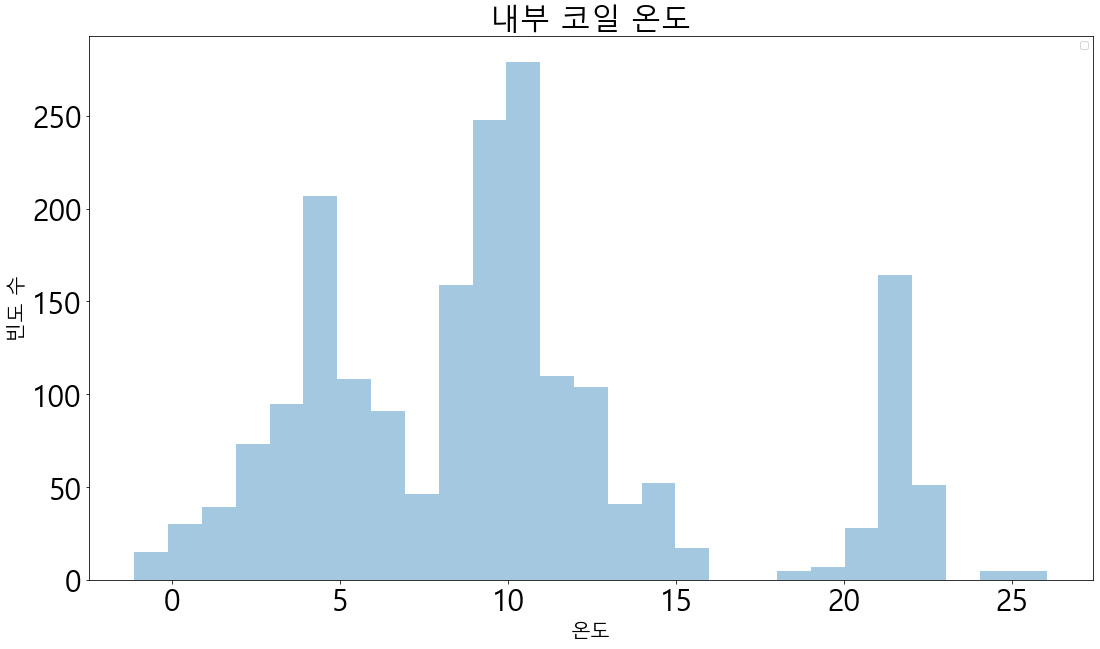

In [13]:
plt.figure(figsize=(18,10))
sns.distplot(cond["TEM_COIL"], kde=False)
plt.title("내부 코일 온도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


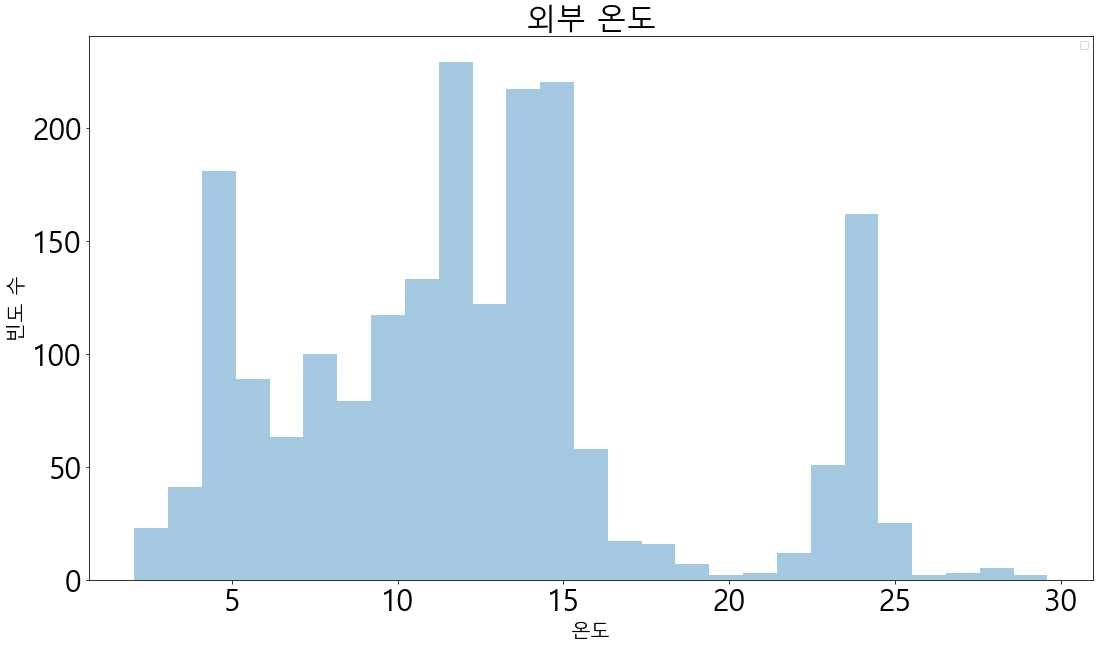

In [14]:
plt.figure(figsize=(18,10))
sns.distplot(cond["TEM_OUT_LOC1"], kde=False)
plt.title("외부 온도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


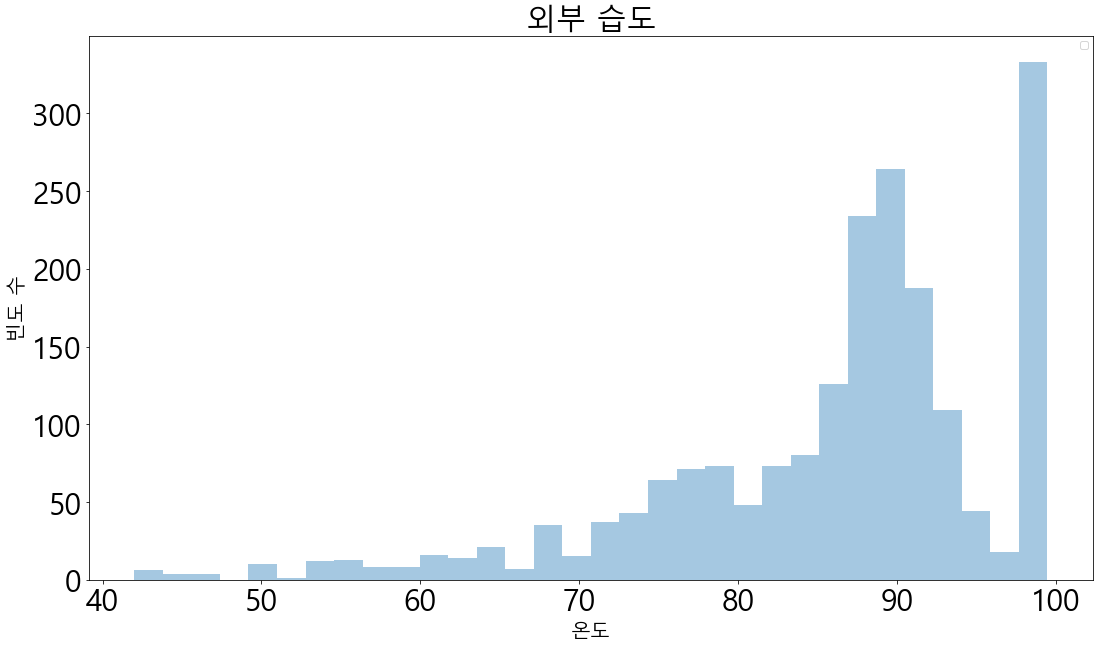

In [15]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_OUT_LOC1"], kde=False)
plt.title("외부 습도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

In [56]:
print('cond["IN_COIL_TEM_D"]의 min값:',cond["IN_COIL_TEM_D"].min())
print('cond["IN_COIL_TEM_D"]의 max값:',cond["IN_COIL_TEM_D"].max())
print('not_cond["IN_COIL_TEM_D"]의 min값:',not_cond["IN_COIL_TEM_D"].min())
print('not_cond["IN_COIL_TEM_D"]의 max값:',not_cond["IN_COIL_TEM_D"].max())

cond["IN_COIL_TEM_D"]의 min값: 1.09
cond["IN_COIL_TEM_D"]의 max값: 7.030000000000001
not_cond["IN_COIL_TEM_D"]의 min값: -13.27
not_cond["IN_COIL_TEM_D"]의 max값: 7.039999999999999


In [55]:
print('cond["HUM_IN_MAX"]의 min값:',cond["HUM_IN_MAX"].min())
print('cond["HUM_IN_MAX"]의 max값:',cond["HUM_IN_MAX"].max())
print('not_cond["HUM_IN_MAX"]의 min값:',not_cond["HUM_IN_MAX"].min())
print('not_cond["HUM_IN_MAX"]의 max값:',not_cond["HUM_IN_MAX"].max())

cond["HUM_IN_MAX"]의 min값: 60.59
cond["HUM_IN_MAX"]의 max값: 93.16
not_cond["HUM_IN_MAX"]의 min값: 28.82
not_cond["HUM_IN_MAX"]의 max값: 93.16


In [57]:
print('cond["LB_MAX_INS_WD"]의 min값:',cond["LB_MAX_INS_WD"].min())
print('cond["LB_MAX_INS_WD"]의 max값:',cond["LB_MAX_INS_WD"].max())
print('not_cond["LB_MAX_INS_WD"]의 min값:',not_cond["LB_MAX_INS_WD"].min())
print('not_cond["LB_MAX_INS_WD"]의 max값:',not_cond["LB_MAX_INS_WD"].max())

cond["LB_MAX_INS_WD"]의 min값: 2.0
cond["LB_MAX_INS_WD"]의 max값: 349.0
not_cond["LB_MAX_INS_WD"]의 min값: 0.0
not_cond["LB_MAX_INS_WD"]의 max값: 354.0


In [59]:
print('cond["HUM_IN"]의 min값:',cond["HUM_IN"].min())
print('cond["HUM_IN"]의 max값:',cond["HUM_IN"].max())
print('not_cond["HUM_IN"]의 min값:',not_cond["HUM_IN"].min())
print('not_cond["HUM_IN"]의 max값:',not_cond["HUM_IN"].max())

cond["HUM_IN"]의 min값: 60.59
cond["HUM_IN"]의 max값: 93.16
not_cond["HUM_IN"]의 min값: 8.0
not_cond["HUM_IN"]의 max값: 90.42


In [60]:
print('cond["LB_WD"]의 min값:',cond["LB_WD"].min())
print('cond["LB_WD"]의 max값:',cond["LB_WD"].max())
print('not_cond["LB_WD"]의 min값:',not_cond["LB_WD"].min())
print('not_cond["LB_WD"]의 max값:',not_cond["LB_WD"].max())

cond["LB_WD"]의 min값: 6.0
cond["LB_WD"]의 max값: 359.0
not_cond["LB_WD"]의 min값: 0.0
not_cond["LB_WD"]의 max값: 359.0


not_cond["IN_COIL_TEM_D"]의 min값: -13.27
not_cond["IN_COIL_TEM_D"]의 max값: 7.039999999999999


No handles with labels found to put in legend.


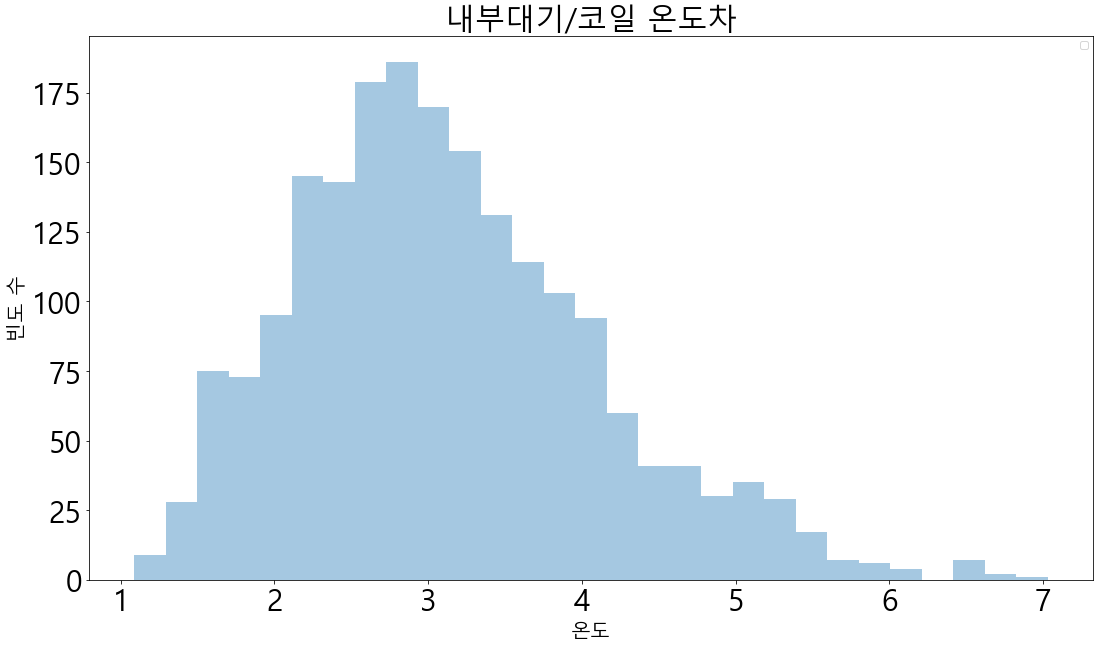

In [29]:
plt.figure(figsize=(18,10))
sns.distplot(cond["IN_COIL_TEM_D"], kde=False)
plt.title("내부대기/코일 온도차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

In [40]:
not_cond = plant.loc[plant["COND_LOC"] == 0]

No handles with labels found to put in legend.


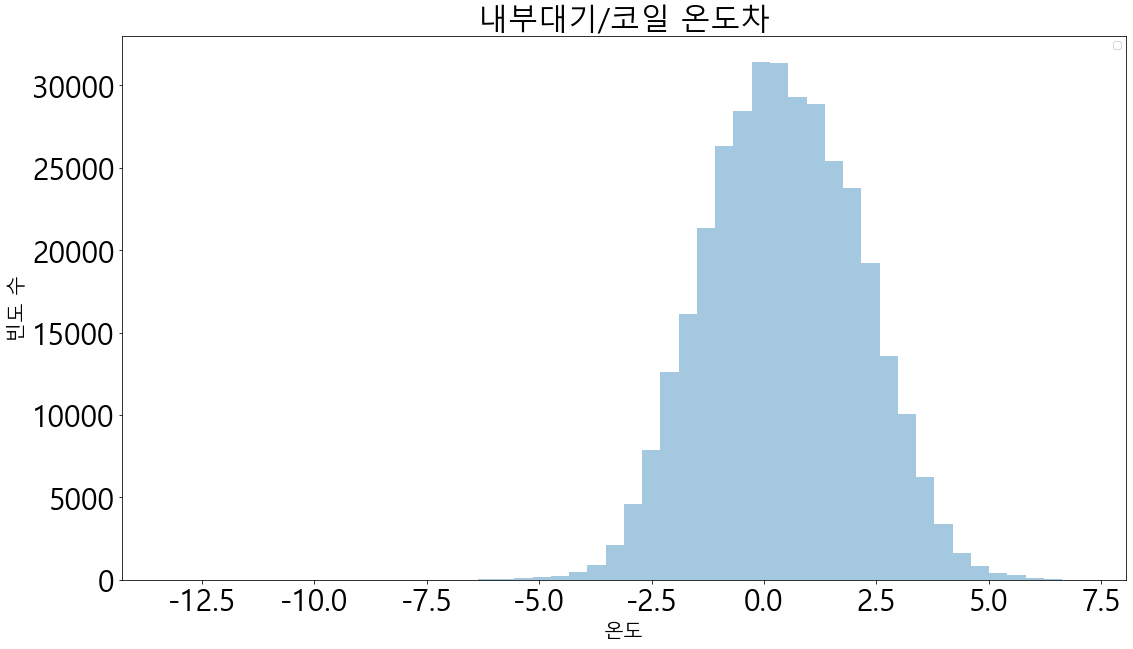

In [41]:
plt.figure(figsize=(18,10))
sns.distplot(not_cond["IN_COIL_TEM_D"], kde=False)
plt.title("내부대기/코일 온도차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


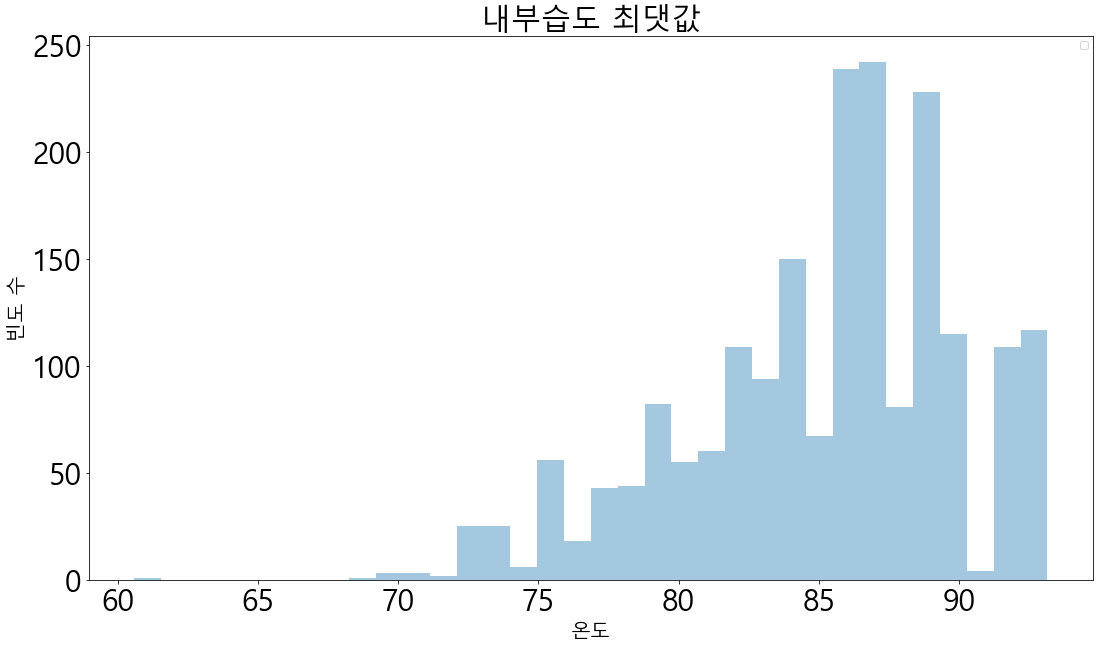

In [31]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN_MAX"], kde=False)
plt.title("내부습도 최댓값", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


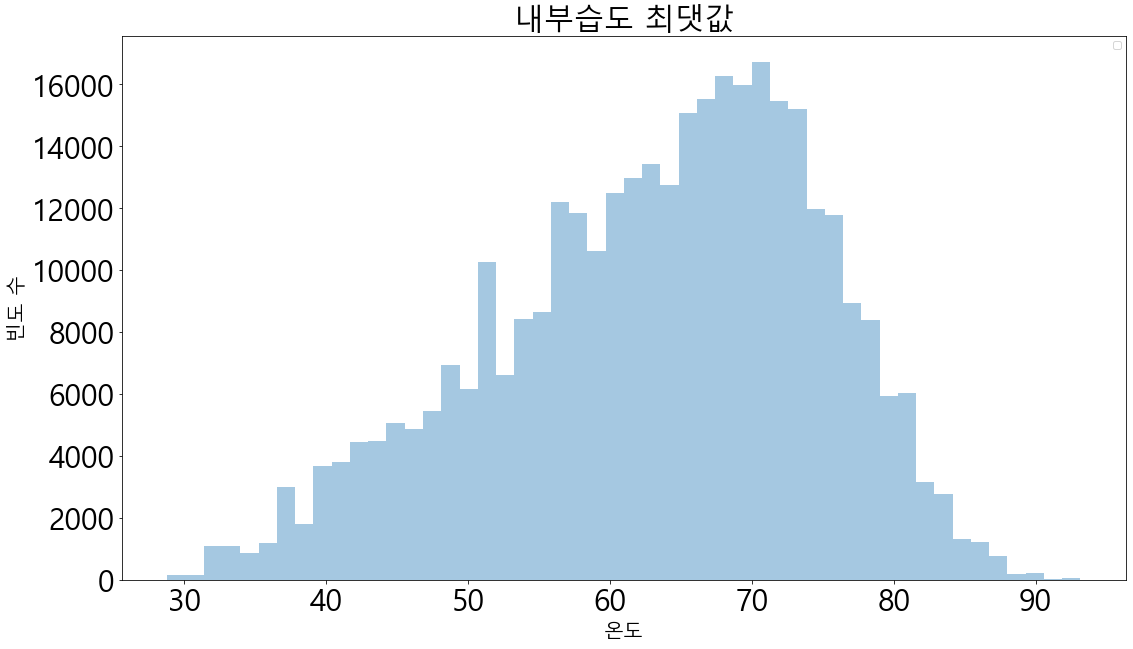

In [42]:
plt.figure(figsize=(18,10))
sns.distplot(not_cond["HUM_IN_MAX"], kde=False)
plt.title("내부습도 최댓값", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


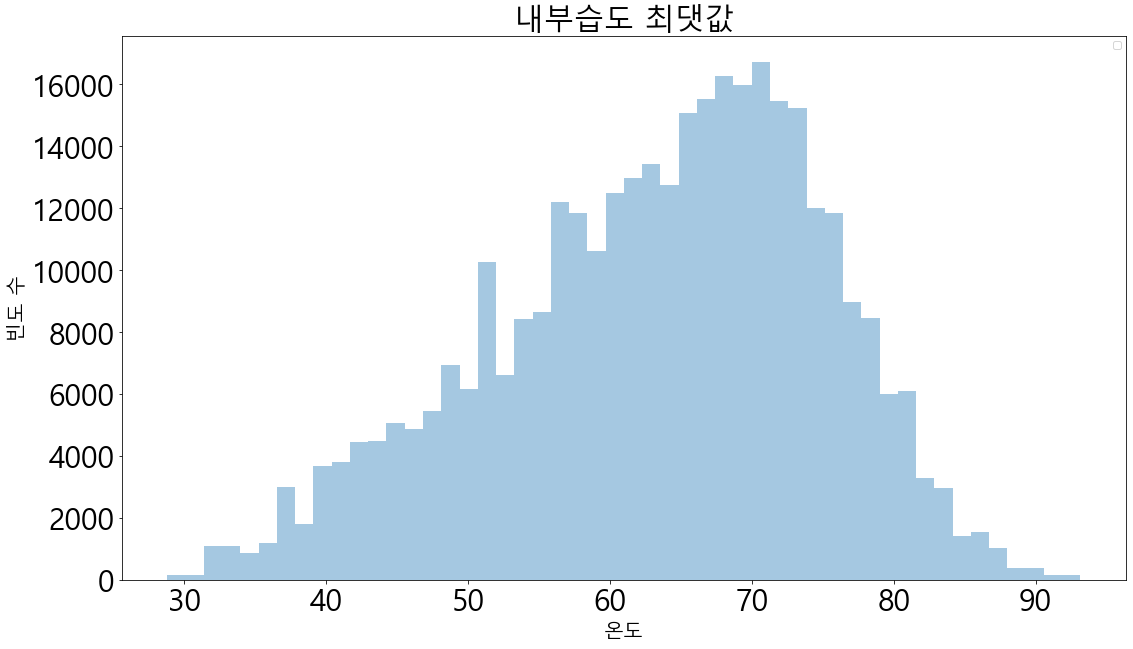

In [32]:
plt.figure(figsize=(18,10))
sns.distplot(plant["HUM_IN_MAX"], kde=False)
plt.title("내부습도 최댓값", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


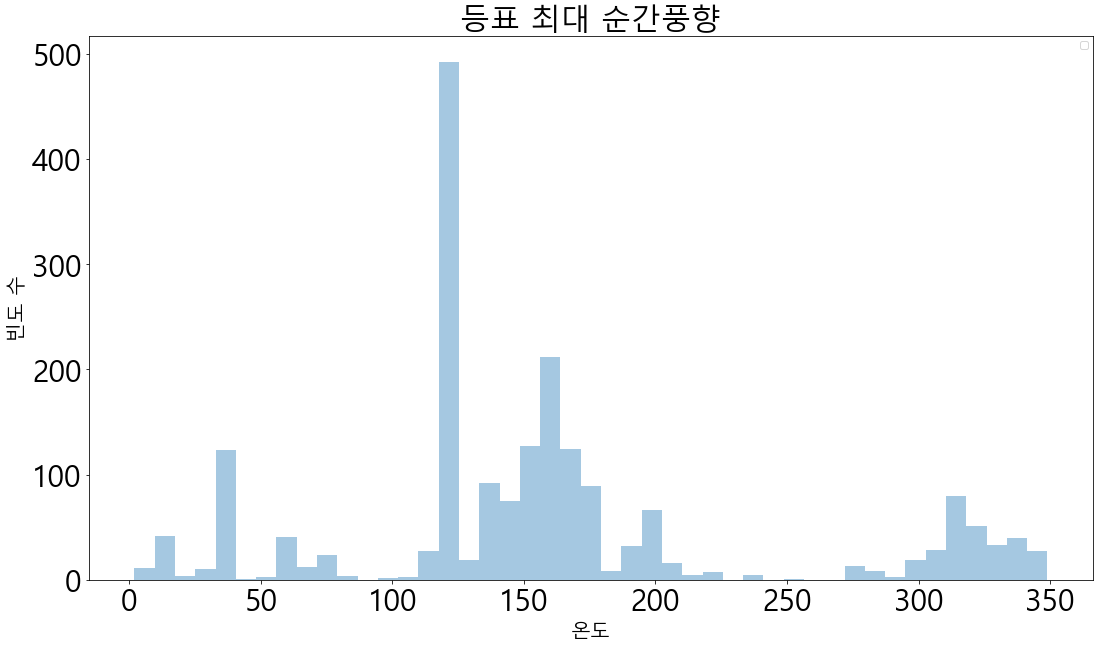

In [35]:
plt.figure(figsize=(18,10))
sns.distplot(cond["LB_MAX_INS_WD"], kde=False)
plt.title("등표 최대 순간풍향", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


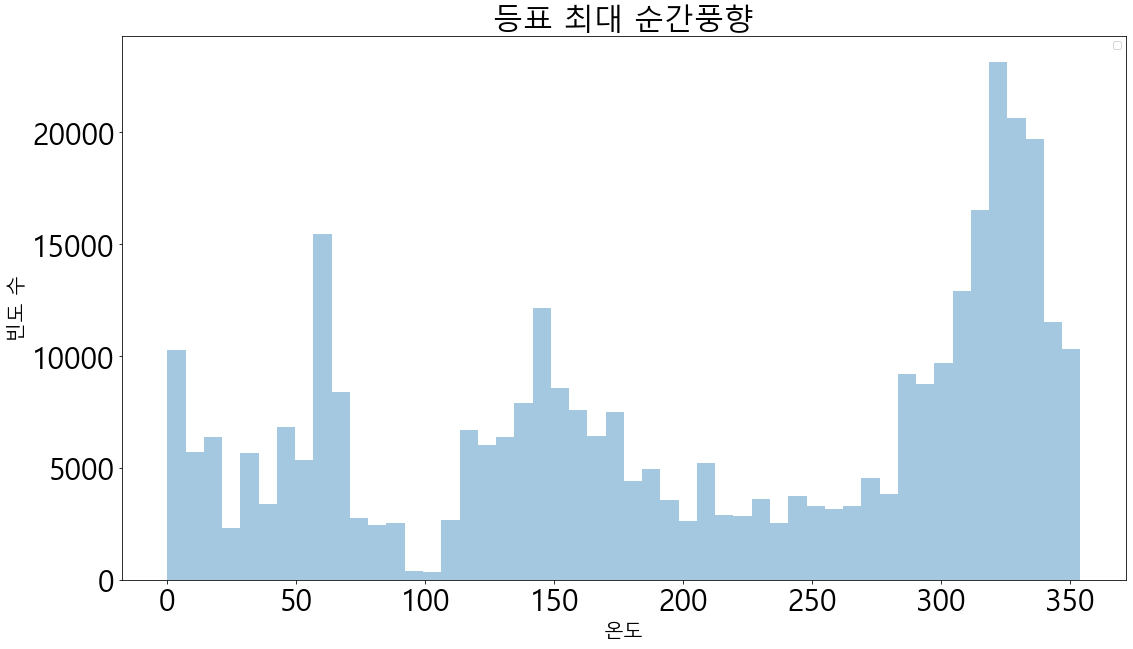

In [43]:
plt.figure(figsize=(18,10))
sns.distplot(not_cond["LB_MAX_INS_WD"], kde=False)
plt.title("등표 최대 순간풍향", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


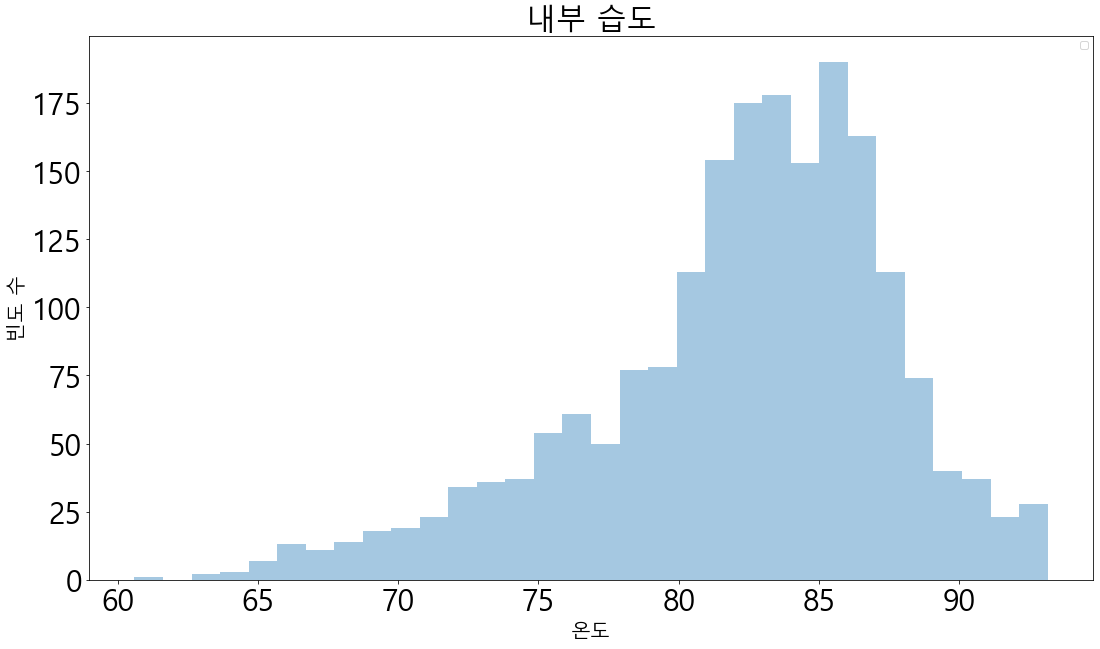

In [45]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN"], kde=False)
plt.title("내부 습도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


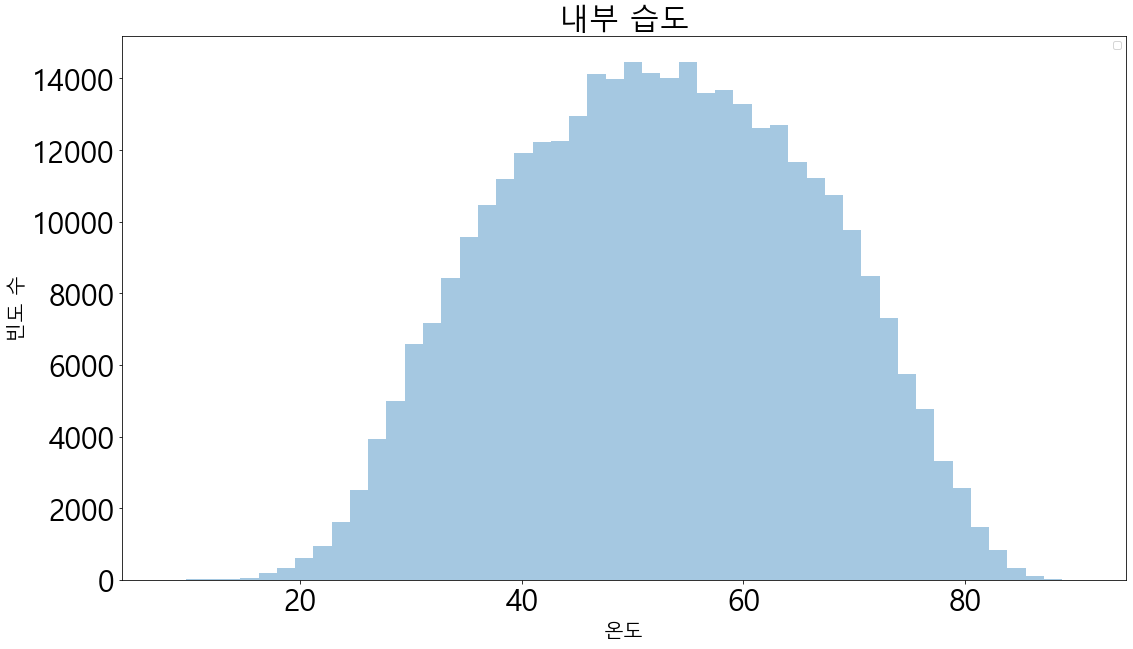

In [44]:
plt.figure(figsize=(18,10))
sns.distplot(not_cond["HUM_IN"], kde=False)
plt.title("내부 습도", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


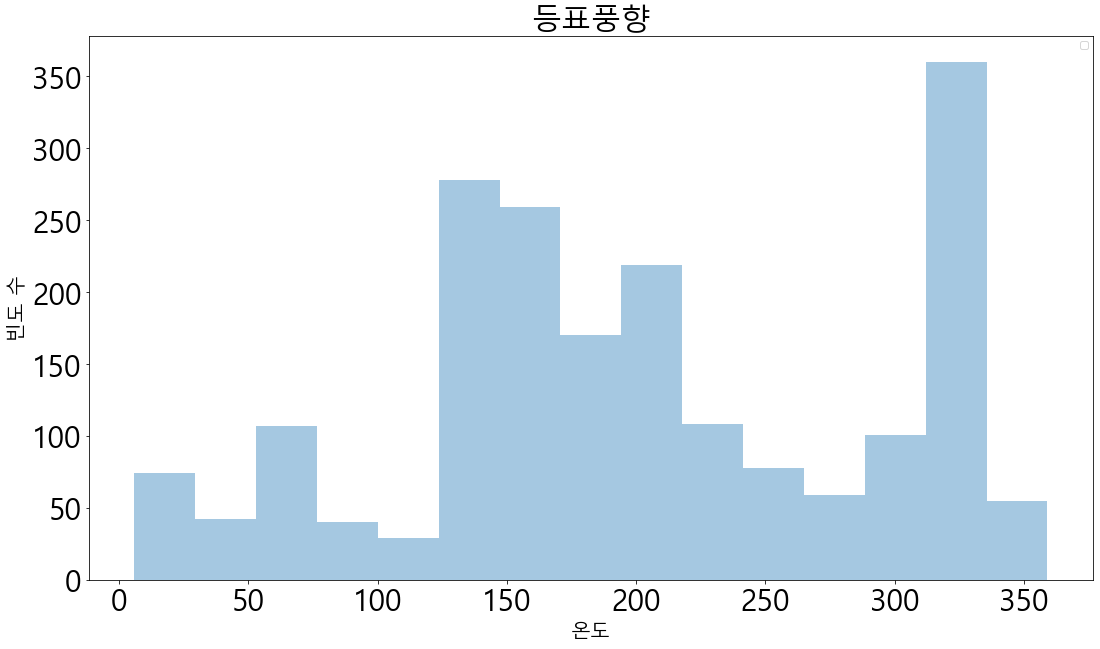

In [39]:
plt.figure(figsize=(18,10))
sns.distplot(cond["LB_WD"], kde=False)
plt.title("등표풍향", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


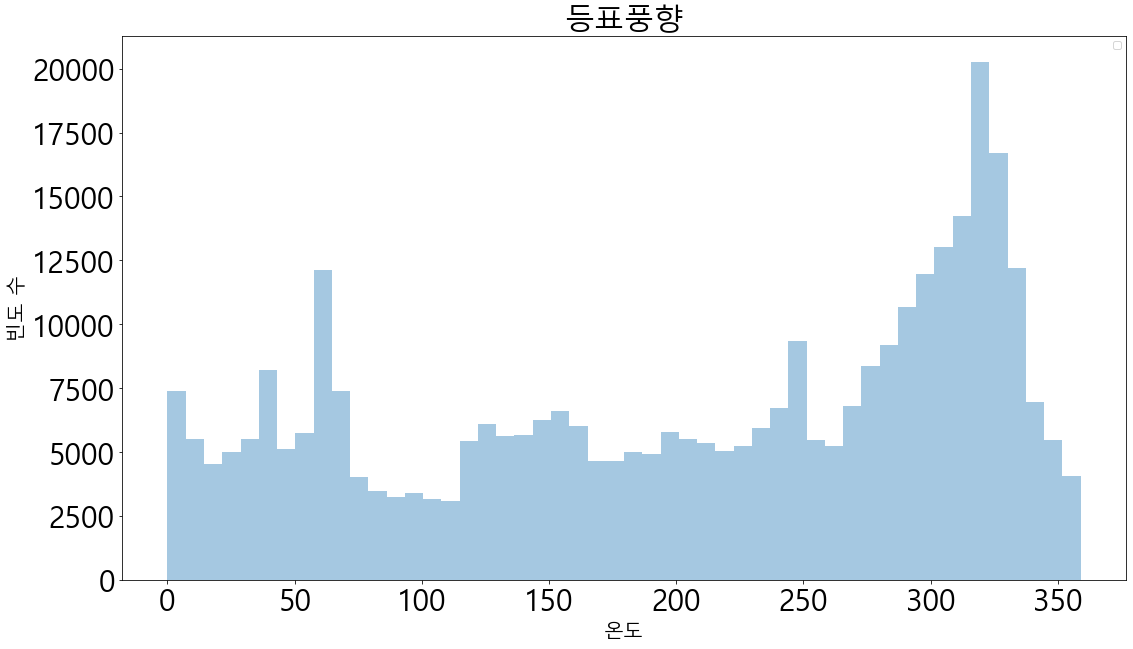

In [47]:
plt.figure(figsize=(18,10))
sns.distplot(not_cond["LB_WD"], kde=False)
plt.title("등표풍향", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


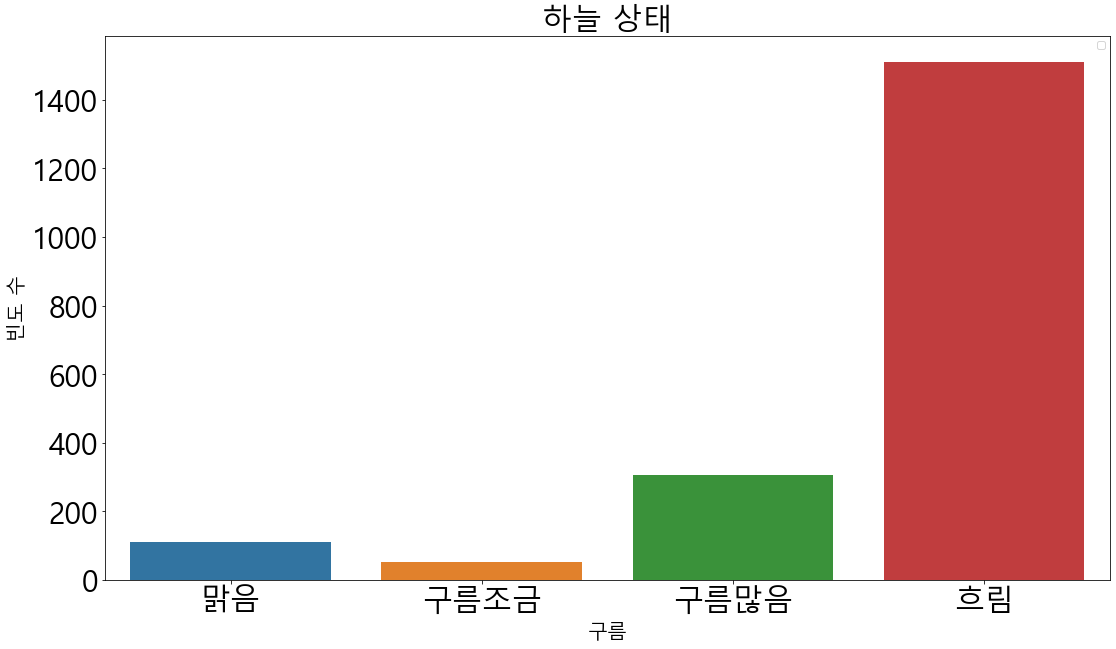

In [17]:
plt.figure(figsize=(18,10))
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral',"ds"]
sns.countplot(cond["SKY"])
plt.title("하늘 상태", fontsize=30)
plt.xlabel("구름",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.yticks(fontsize=30)
plt.xticks(ticks=[0,1,2,3], labels=["맑음", "구름조금", "구름많음", "흐림"],fontsize=30)
plt.legend()
plt.show()

In [18]:
cond.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
139,2016-04-06 09:00:00,1,3,13.0,84.0,11.0,11.0,45.0,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,8.400606,2.0,2.0,1,1,1,4,17.0,84.0,15.0,20.0,62.0,1017.2,1019.9,0.0,9.775,1.400,1.850,115.750,2.80,118.850,145.0,4.0,5.3,1019.6,78.0,8.3,0.0,0.0,41.0,3.8,48.0,5.0,7.9,1019.6,65.0,13.2,0.0,47.3,2.0,1016.0,1019.5,34.4,1.16,3600.0,4.0
179,2016-04-08 09:00:00,1,2,13.0,80.0,10.0,9.0,75.0,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,6.709351,4.0,3.0,0,1,1,4,16.0,80.0,14.0,16.0,81.0,1014.9,1017.6,0.0,8.450,1.075,1.825,210.325,2.65,206.025,180.0,2.0,4.0,1017.2,100.0,6.3,0.0,0.0,144.0,3.6,176.0,6.0,5.0,1017.6,97.0,7.5,0.0,229.4,1.6,1014.4,1018.0,97.4,0.55,0.0,2.0
187,2016-04-08 09:00:00,1,3,12.0,82.0,9.0,9.0,75.0,1.0,2016-04-09 09:00:00,1.0,2016-04-10 09:00:00,0.0,6.092657,3.0,3.0,0,1,1,4,15.0,82.0,13.0,16.0,81.0,1014.9,1017.6,0.0,8.450,1.075,1.825,210.325,2.65,206.025,180.0,2.0,4.0,1017.2,100.0,6.3,0.0,0.0,144.0,3.6,176.0,6.0,5.0,1017.6,97.0,7.5,0.0,229.4,1.6,1014.4,1018.0,97.4,0.55,0.0,2.0
188,2016-04-08 12:00:00,1,3,13.0,80.0,10.0,12.0,63.0,1.0,2016-04-09 12:00:00,0.0,2016-04-10 12:00:00,0.0,6.709351,1.0,3.0,0,1,1,4,15.0,82.0,13.0,16.0,81.0,1014.2,1016.8,0.0,15.450,2.750,3.575,190.725,5.40,181.400,189.0,6.0,7.7,1017.3,100.0,6.2,0.0,0.0,145.0,5.4,139.0,7.0,7.0,1016.8,97.0,14.9,0.0,193.8,4.0,1013.5,1016.9,71.7,5.77,8400.0,2.0
203,2016-04-09 09:00:00,1,2,13.0,79.0,9.0,11.0,75.0,1.0,2016-04-10 09:00:00,0.0,2016-04-11 09:00:00,0.0,5.554251,2.0,4.0,0,1,1,4,17.0,79.0,15.0,15.0,85.0,1012.8,1015.5,0.0,10.225,2.525,3.175,198.575,4.70,206.725,179.0,5.0,7.2,1014.8,100.0,7.2,0.0,0.0,132.0,4.0,151.0,6.0,7.3,1015.4,97.0,9.0,0.0,190.0,3.6,1012.2,1015.7,97.4,0.27,0.0,1.0


In [19]:
cond[["PLANT", "LOC"]].groupby(by="PLANT").count()

,LOC
PLANT,
1,1407
2,572


In [20]:
condLoc =cond.pivot_table(index="PLANT", columns="LOC",values="MEA_DDHR" ,aggfunc="count")
condLoc

LOC,1,2,3
PLANT,,,
1,275,487,645
2,270,272,30


In [21]:
condLoc.iloc[:1,:]

LOC,1,2,3
PLANT,,,
1,275,487,645


In [22]:
condLoc.iloc[1:2,:]

LOC,1,2,3
PLANT,,,
2,270,272,30


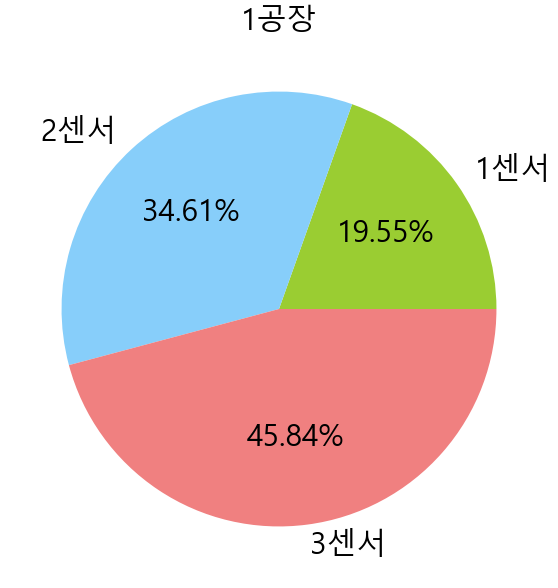

In [23]:
group_size = ["275","487","645"]
group_location = ["1센서", "2센서","3센서"]
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
plt.figure(figsize=(18,10))

plt.pie(group_size,autopct='%1.2f%%',textprops={'fontsize': 30},labels=group_location,
       colors=group_colors)
plt.title("1공장", fontsize=30)
plt.show()

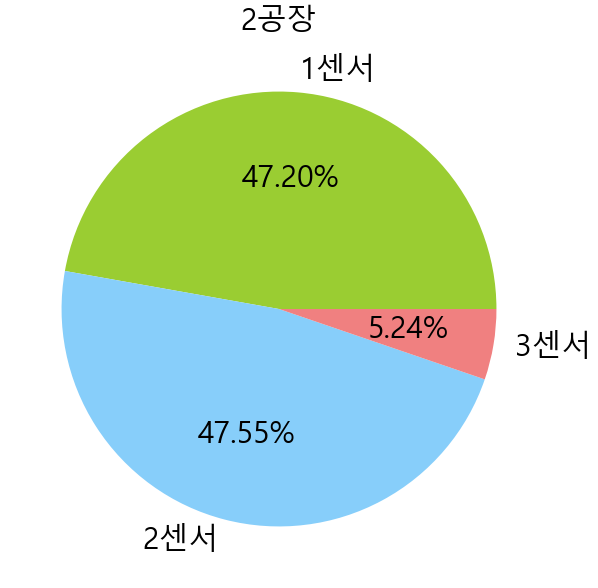

In [24]:
group_size = ["270","272","30"]
group_location = ["1센서", "2센서","3센서"]
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
plt.figure(figsize=(18,10))

plt.pie(group_size,autopct='%1.2f%%',textprops={'fontsize': 30},labels=group_location,
       colors=group_colors)
plt.title("2공장",fontsize=30)
plt.show()

No handles with labels found to put in legend.


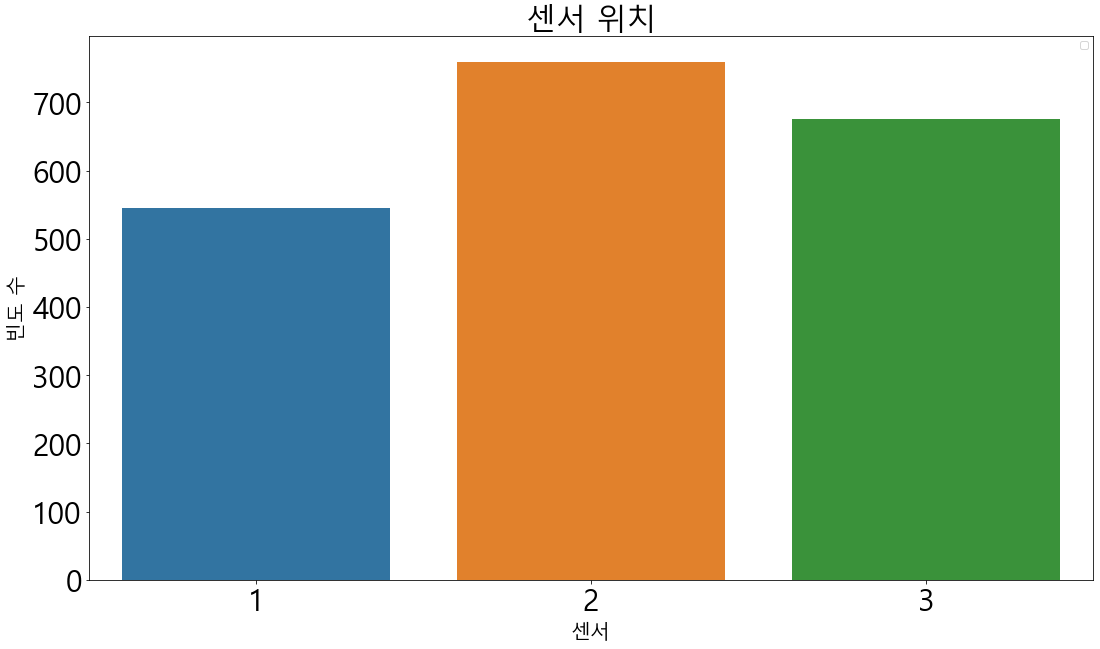

In [25]:
plt.figure(figsize=(18,10))
sns.countplot("LOC", data=cond)
plt.title("센서 위치", fontsize=30)
plt.xlabel("센서",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


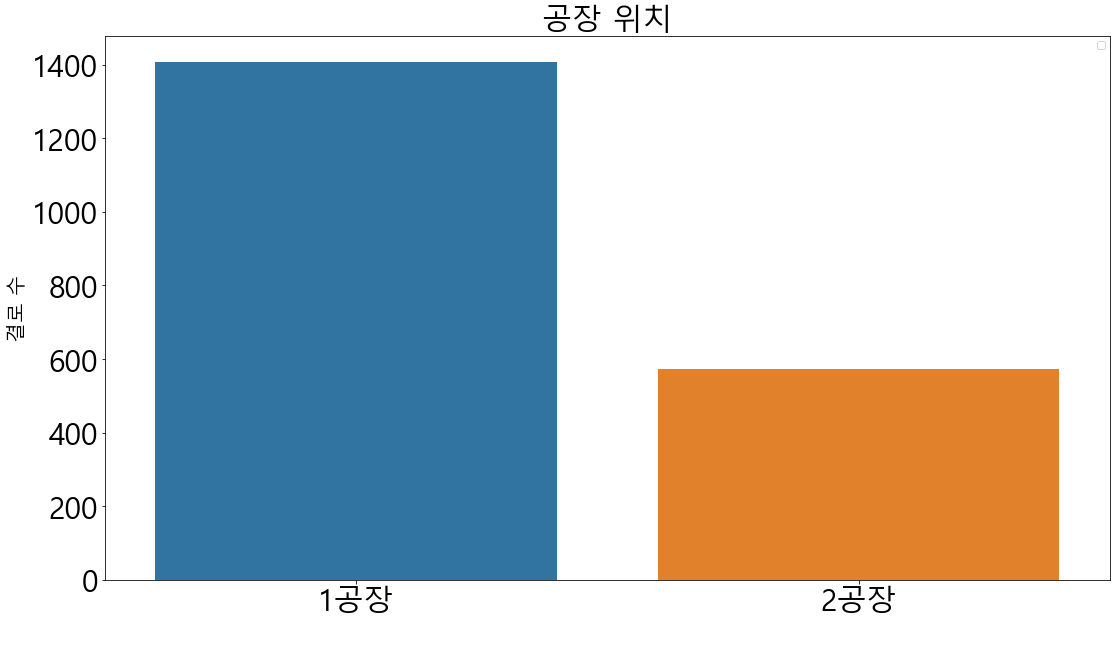

In [26]:
plt.figure(figsize=(18,10))
sns.countplot("PLANT", data=cond)
plt.title("공장 위치", fontsize=30)
plt.xlabel(" ",  fontsize=20)
plt.ylabel("결로 수" ,fontsize=20)
plt.xticks(ticks=[0,1], labels=["1공장", "2공장"],fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

In [27]:
cond.head(1)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
139,2016-04-06 09:00:00,1,3,13.0,84.0,11.0,11.0,45.0,1.0,2016-04-07 09:00:00,0.0,2016-04-08 09:00:00,1.0,8.400606,2.0,2.0,1,1,1,4,17.0,84.0,15.0,20.0,62.0,1017.2,1019.9,0.0,9.775,1.4,1.85,115.75,2.8,118.85,145.0,4.0,5.3,1019.6,78.0,8.3,0.0,0.0,41.0,3.8,48.0,5.0,7.9,1019.6,65.0,13.2,0.0,47.3,2.0,1016.0,1019.5,34.4,1.16,3600.0,4.0


In [23]:
cond["HUM_IN_MAX"] - cond["HUM_IN"]

139       0.00
179       0.00
187       0.00
188       2.00
203       0.00
          ... 
340432    1.13
340433    0.19
340434    0.34
340435    1.04
340436    0.19
Length: 1979, dtype: float64

No handles with labels found to put in legend.


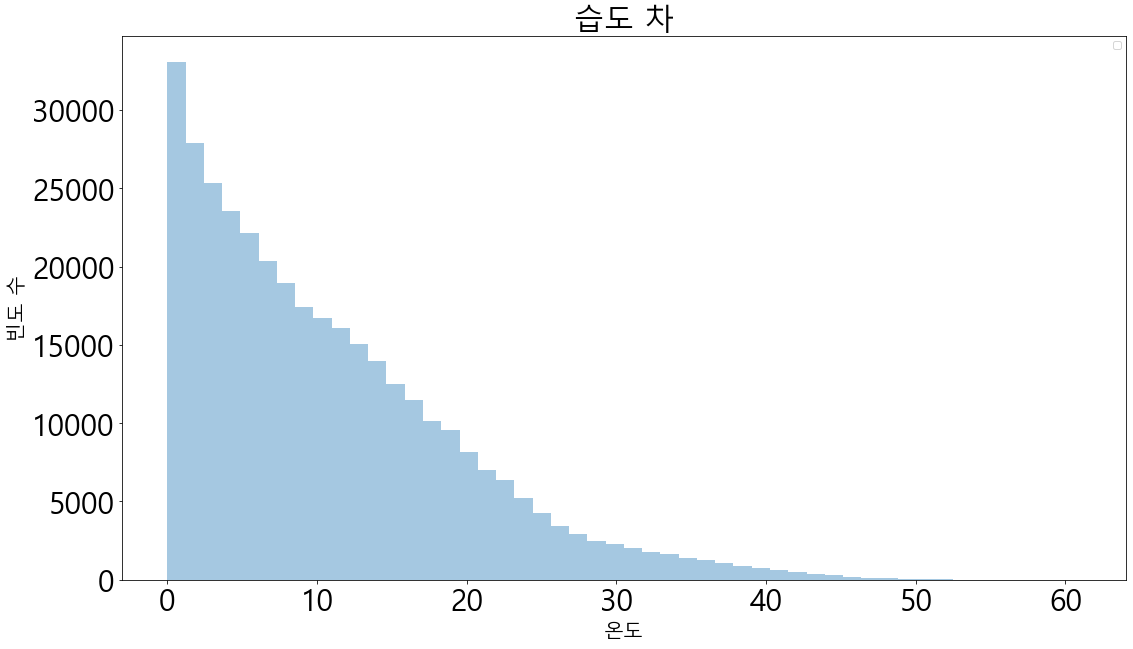

In [24]:
plt.figure(figsize=(18,10))
sns.distplot(plant["HUM_IN_MAX"] - plant["HUM_IN"], kde=False)
plt.title("습도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


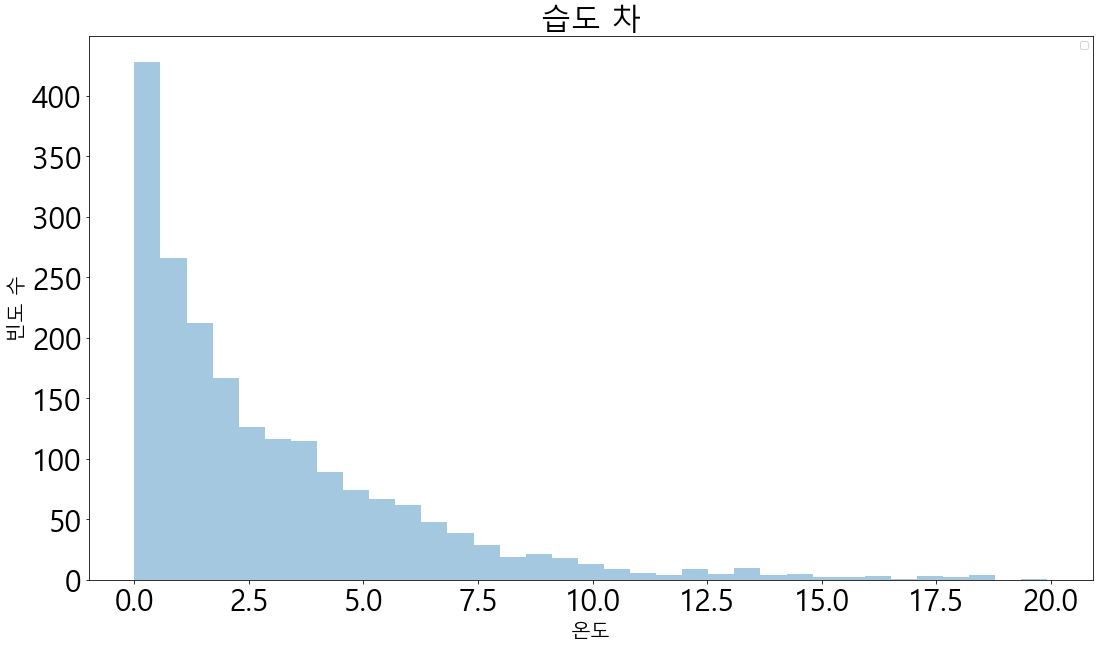

In [25]:
plt.figure(figsize=(18,10))
sns.distplot(cond["HUM_IN_MAX"] - cond["HUM_IN"], kde=False)
plt.title("습도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

In [26]:
cond["TEM_IN_MAX"] - cond["TEM_IN"]

139       4.00
179       3.00
187       3.00
188       2.00
203       4.00
          ... 
340432    1.06
340433    1.06
340434    1.13
340435    1.22
340436    1.19
Length: 1979, dtype: float64

No handles with labels found to put in legend.


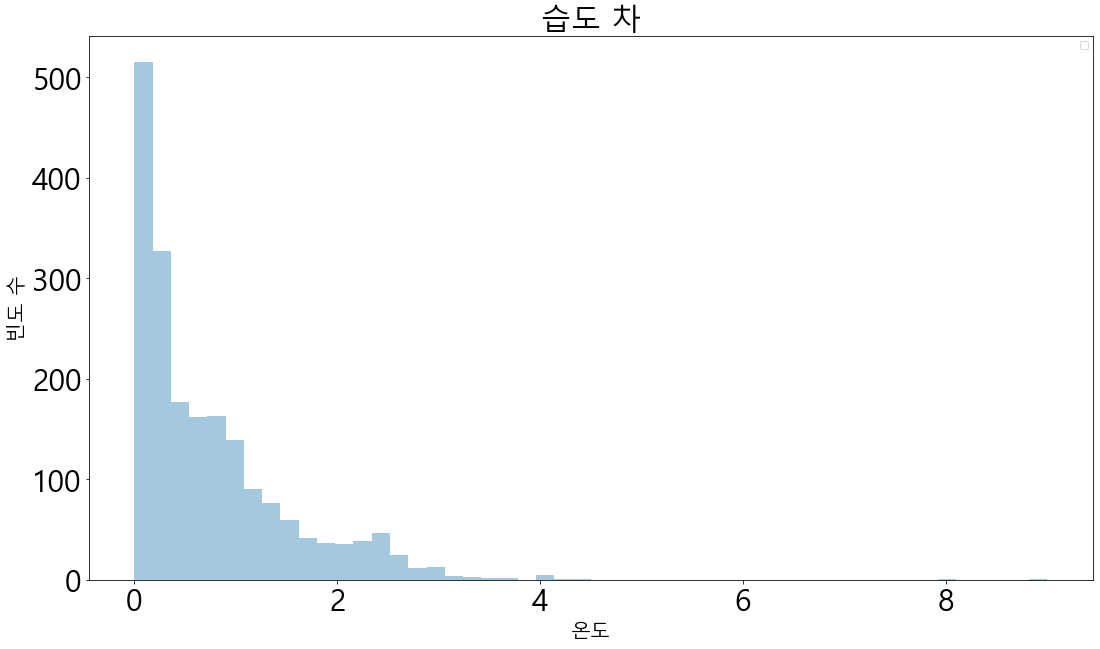

In [27]:
plt.figure(figsize=(18,10))
sns.distplot(cond["TEM_IN_MAX"] - cond["TEM_IN"], kde=False)
plt.title("습도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


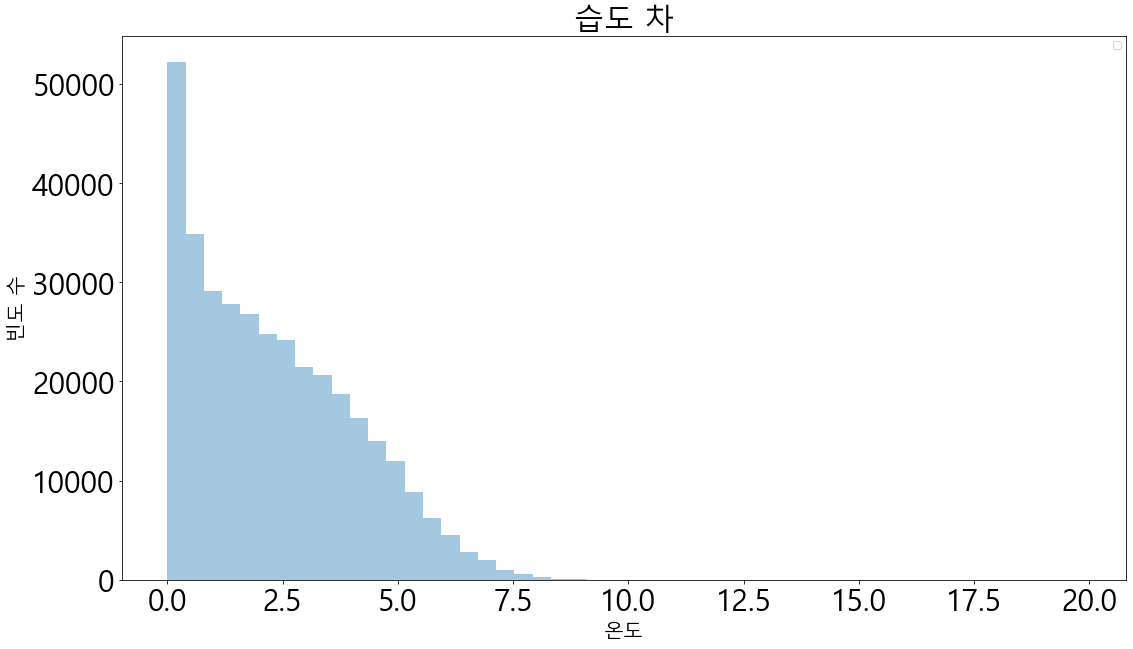

In [28]:
plt.figure(figsize=(18,10))
sns.distplot(plant["TEM_IN_MAX"] - plant["TEM_IN"], kde=False)
plt.title("습도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


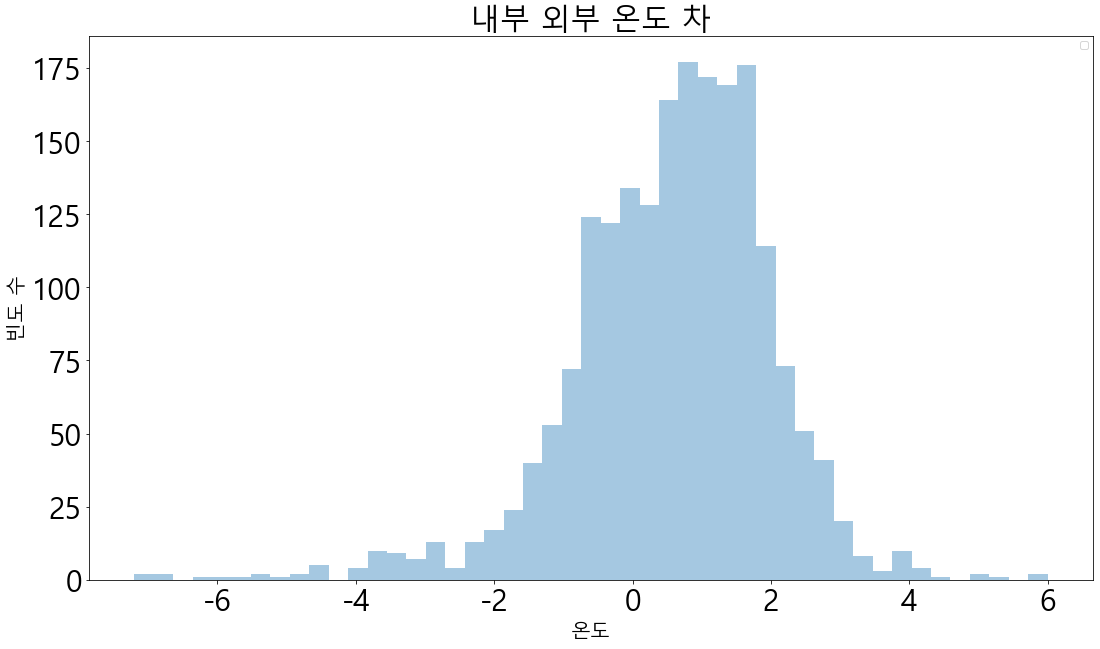

In [29]:
plt.figure(figsize=(18,10))
sns.distplot(cond["IN_OUT_TEM_D"], kde=False)
plt.title("내부 외부 온도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


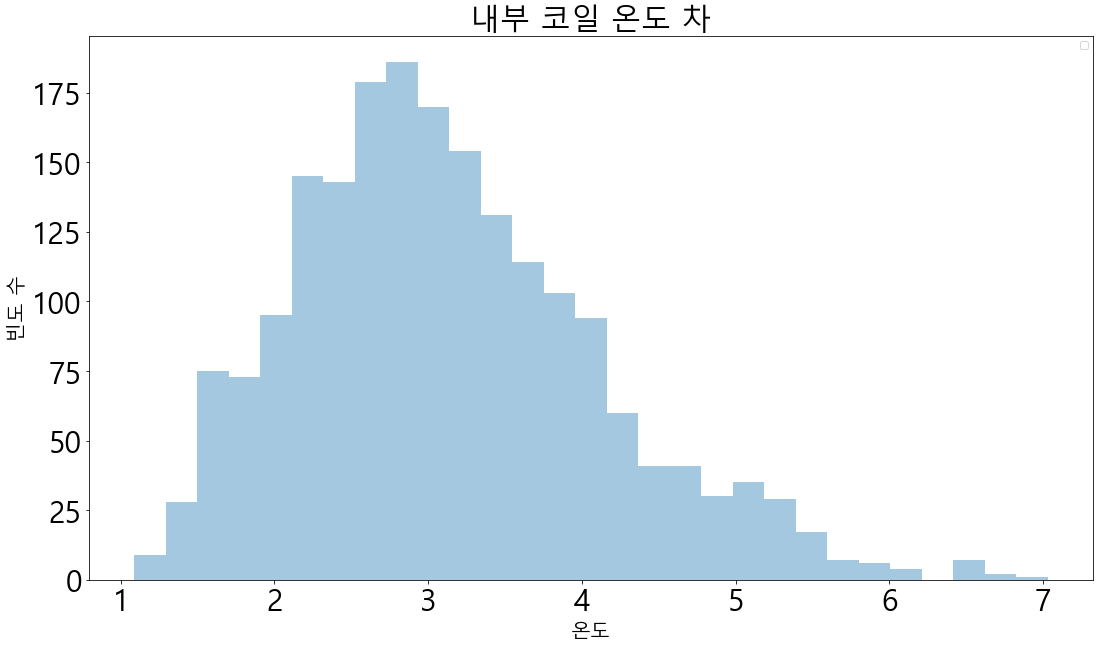

In [30]:
plt.figure(figsize=(18,10))
sns.distplot(cond["IN_COIL_TEM_D"], kde=False)
plt.title("내부 코일 온도 차", fontsize=30)
plt.xlabel("온도",  fontsize=20)
plt.ylabel("빈도 수" ,fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()